___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

# PART- 3 `( Handling With Outliers )`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
df = pd.read_csv("scout_filled.csv")

In [3]:
df.shape

(15919, 27)

In [4]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.00,80000.00,83450.00
hp_kw,66.00,141.00,85.00
type,Used,Used,Used
previous_owners,2.00,1.00,1.00
inspection_new,1,0,0
age,3.00,2.00,3.00


In [5]:
df.isnull().sum()/df.shape[0]*100

make_model            0.00
body_type             0.00
price                 0.00
vat                   0.00
km                    0.00
hp_kw                 0.00
type                  0.00
previous_owners       0.00
inspection_new        0.00
age                   0.00
body_color            0.00
paint_type            0.00
upholstery_type       0.00
nr_of_doors           0.00
nr_of_seats           0.00
gearing_type          0.00
displacement_cc       0.00
weight_kg             0.00
drive_chain           0.00
fuel                  0.00
cons_comb             0.00
co2_emission          0.00
comfort_convenience   0.00
entertainment_media   0.00
extras                0.00
safety_security       0.00
gears                 0.00
dtype: float64

## Examining Outliers in the Columns

In [6]:
# Creating a function to examine the features.

def look_before(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

## price

In [7]:
look_before("price")

column name    :  price
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2956
--------------------------------
14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64


In [8]:
df.price.describe()

count   15919.00
mean    18019.90
std      7386.17
min        13.00
25%     12850.00
50%     16900.00
75%     21900.00
max     74600.00
Name: price, dtype: float64

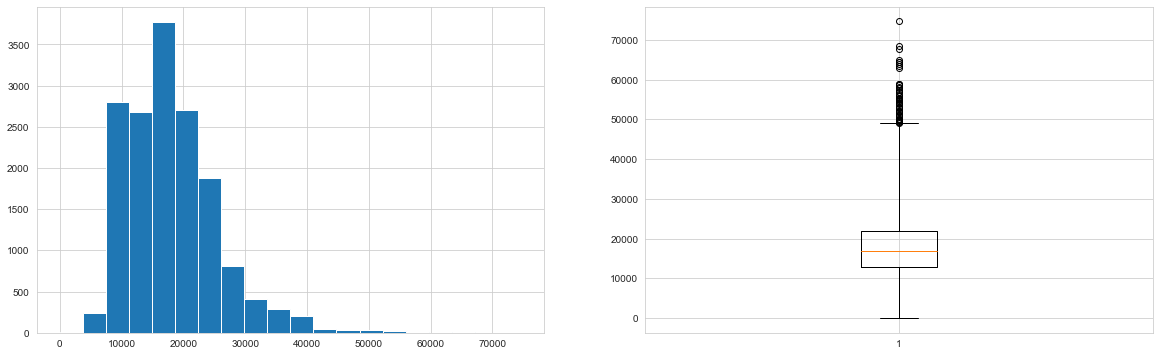

In [9]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

In [10]:
df.price.sort_values().head(5)

8594      13
8828     120
6066     255
8829     331
8827    4950
Name: price, dtype: int64

In [11]:
drop_index = df.price.sort_values().index[:4]
drop_index

Int64Index([8594, 8828, 6066, 8829], dtype='int64')

In [12]:
df.drop(drop_index, axis=0, inplace=True)

In [13]:
df.shape

(15915, 27)

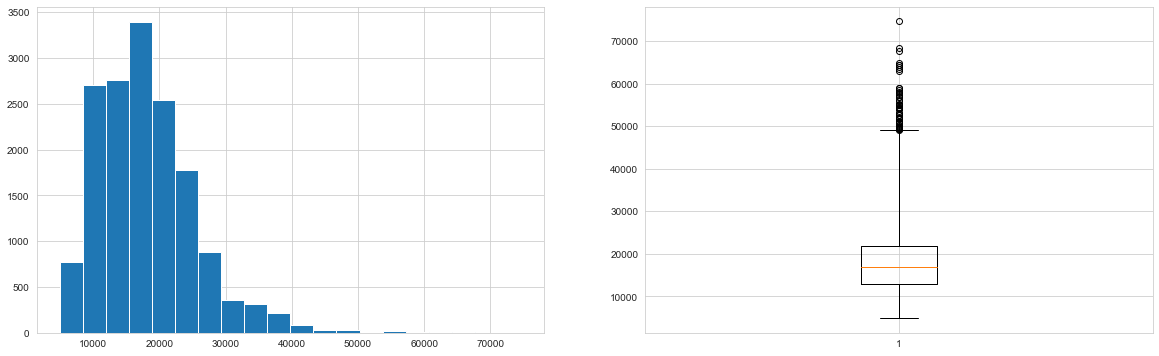

In [14]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

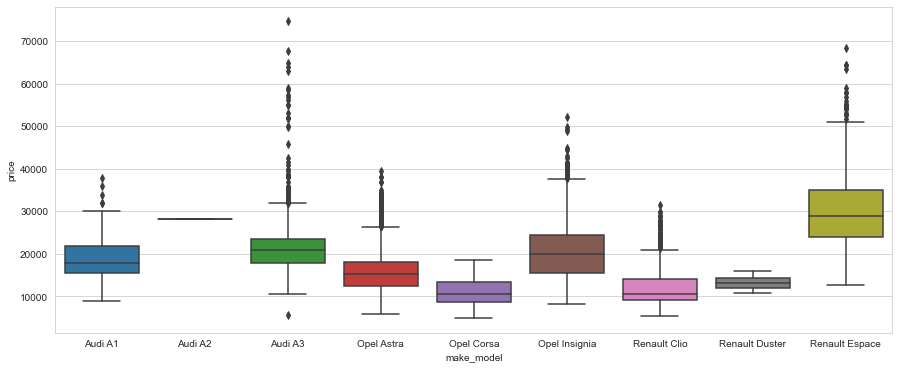

In [15]:
plt.figure(figsize=(15,6))
sns.boxplot(y='price',data=df, x='make_model');

### km

In [16]:
look_before("km")

column name    :  km
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6698
--------------------------------
10.00       1044
16.99        848
1.00         367
5.00         170
50.00        148
            ... 
67469.00       1
43197.00       1
10027.00       1
35882.00       1
57.00          1
Name: km, Length: 6698, dtype: int64


In [17]:
df.km.describe()

count    15915.00
mean     31975.15
std      37070.62
min          0.00
25%       2000.00
50%      20416.00
75%      46900.00
max     317000.00
Name: km, dtype: float64

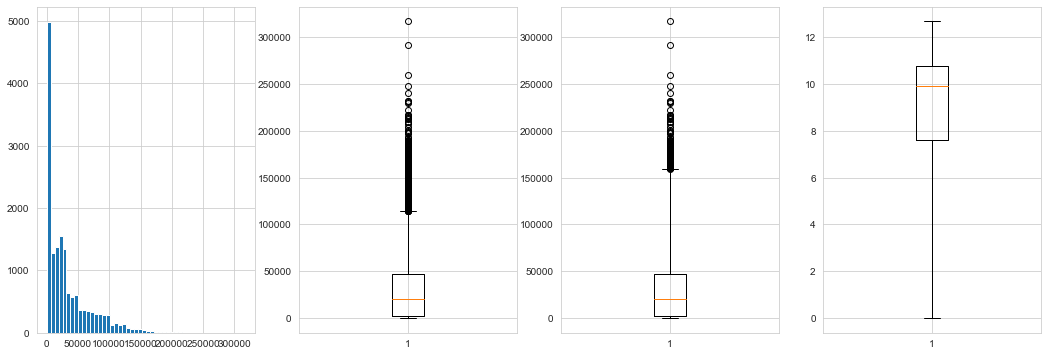

In [18]:
plt.figure(figsize=(18, 6))

plt.subplot(141)
plt.hist(df.km, bins=50)

plt.subplot(142)
plt.boxplot(df.km)

plt.subplot(143)
plt.boxplot(df.km, whis=2.5)

plt.subplot(144)
plt.boxplot(np.log(df.km), whis=2.5)

plt.show()

### Gears

In [19]:
look_before("gears")

column name    :  gears
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  10
--------------------------------
6.00     8612
5.00     4254
7.00     2810
8.00      225
9.00        6
1.00        2
3.00        2
4.00        2
2.00        1
50.00       1
Name: gears, dtype: int64


In [20]:
df.gears.describe()

count   15915.00
mean        5.94
std         0.79
min         1.00
25%         5.00
50%         6.00
75%         6.00
max        50.00
Name: gears, dtype: float64

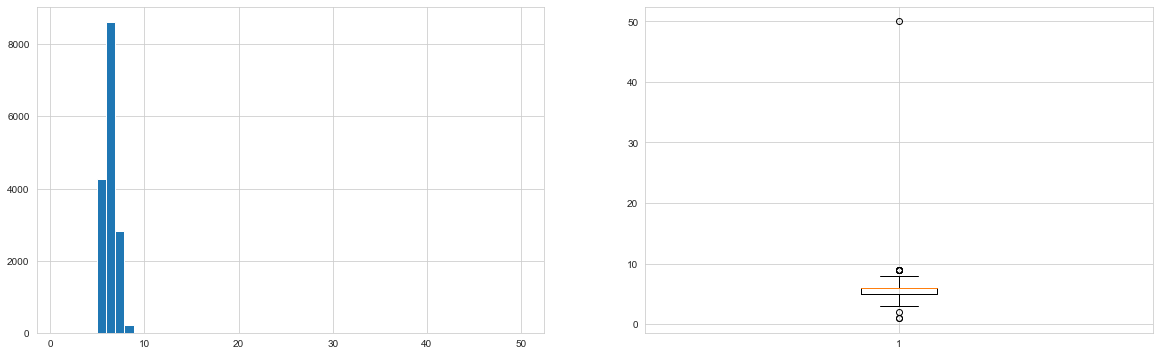

In [21]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.gears, bins=50)

plt.subplot(122)
plt.boxplot(df.gears, whis=2.5)

plt.show()

In [22]:
df[(df.gears < 5) | (df.gears > 8)][["make_model", "body_type", "gearing_type", "gears"]]

,make_model,body_type,gearing_type,gears
8921,Opel Corsa,Compact,Semi-automatic,1.00
9812,Opel Corsa,Sedans,Manual,2.00
14375,Renault Clio,Compact,Automatic,1.00
14495,Renault Clio,Sedans,Manual,50.00
15812,Renault Espace,Van,Automatic,9.00
15814,Renault Espace,Van,Automatic,9.00
15817,Renault Espace,Van,Automatic,3.00
15822,Renault Espace,Van,Automatic,4.00
15823,Renault Espace,Van,Automatic,4.00
15824,Renault Espace,Van,Automatic,9.00


In [23]:
df["gears"].replace([1, 2, 3, 4, 9, 50], np.nan, inplace=True)

In [24]:
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
                
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [25]:
fill(df, "make_model", "body_type", "gears", "mode")

Number of NaN :  0
------------------
6.00    8622
5.00    4258
7.00    2810
8.00     225
Name: gears, dtype: int64


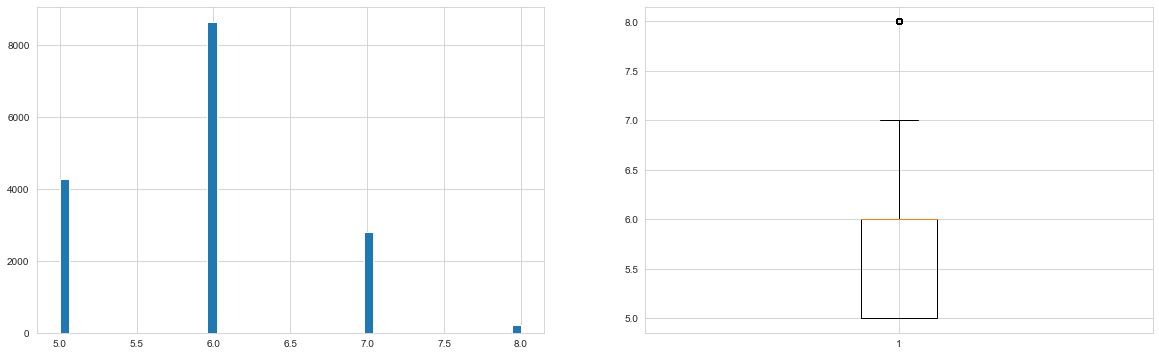

In [26]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.gears, bins=50)

plt.subplot(122)
plt.boxplot(df.gears, whis=1.5)

plt.show()

### displacement_cc

In [27]:
look_before("displacement_cc")

column name    :  displacement_cc
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  77
--------------------------------
1598.00     5043
999.00      2465
1398.00     1386
1399.00      768
1229.00      678
1956.00      670
1461.00      667
1490.00      559
1422.00      467
1197.00      372
898.00       351
1395.00      320
1968.00      301
1149.00      288
1618.00      212
1798.00      210
1498.00      196
1600.00      130
1248.00      110
1997.00      103
1364.00      102
1400.00       90
998.00        72
1500.00       50
2000.00       46
1000.00       40
1.00          36
1998.00       25
2480.00       20
1200.00       18
1984.00       18
1397.00       11
899.00        11
160.00         6
929.00         5
1499.00        5
997.00         4
1596.00        4
139.00         4
900.00         4
1599.00        3
1199.00        3
1396.00        3
1495.00        2
1589.00        2
1300.00        2
2.00           2
995.00         2
1496.00        1
89

In [28]:
df.displacement_cc.describe()

count   15915.00
mean     1425.65
std       329.72
min         1.00
25%      1229.00
50%      1461.00
75%      1598.00
max     16000.00
Name: displacement_cc, dtype: float64

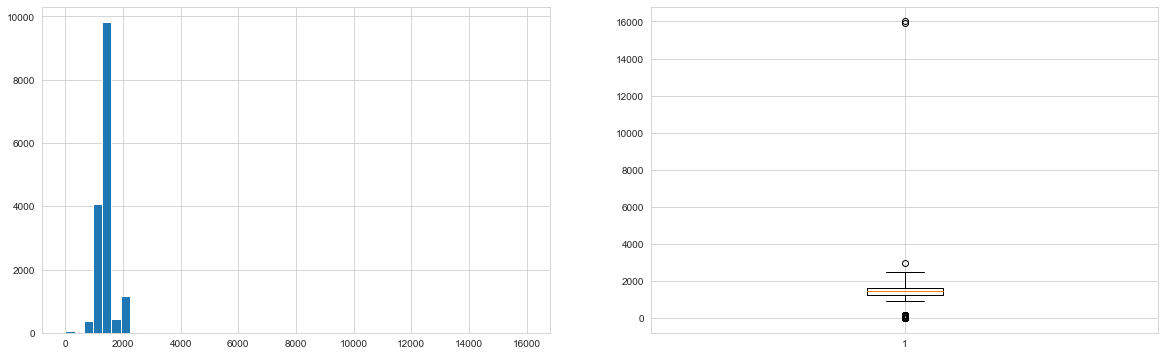

In [29]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.displacement_cc, bins=50)

plt.subplot(122)
plt.boxplot(df.displacement_cc, whis=2.5)

plt.show()

### weight_kg

In [30]:
look_before("weight_kg")

column name    :  weight_kg
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  434
--------------------------------
1163.00    1581
1360.00    1406
1487.00     957
1135.00     828
1425.00     731
           ... 
1331.00       1
1132.00       1
1252.00       1
1792.00       1
2037.00       1
Name: weight_kg, Length: 434, dtype: int64


In [31]:
df.weight_kg.describe()

count   15915.00
mean     1337.15
std       200.63
min         1.00
25%      1165.00
50%      1289.00
75%      1472.00
max      2471.00
Name: weight_kg, dtype: float64

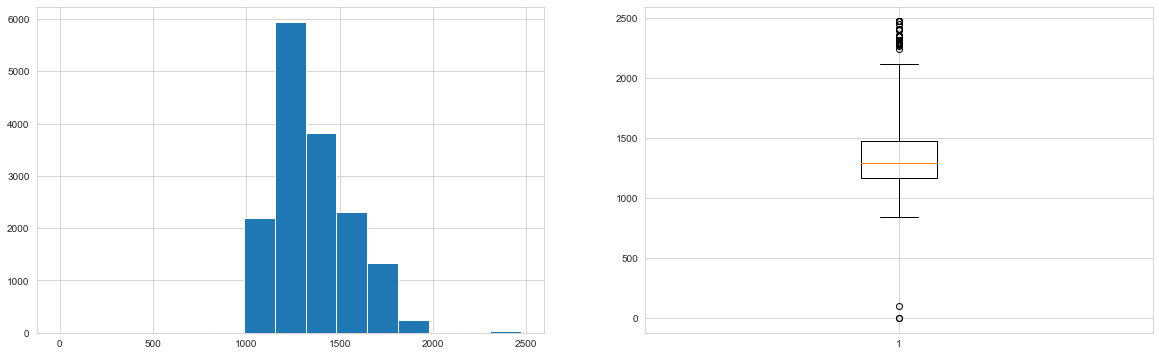

In [32]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.weight_kg, bins=15)

plt.subplot(122)
plt.boxplot(df.weight_kg, whis=2.5)

plt.show()

### hp_kw

In [33]:
look_before("hp_kw")

column name    :  hp_kw
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  80
--------------------------------
85.00     2543
66.00     2121
81.00     1403
100.00    1314
110.00    1113
70.00      890
125.00     710
51.00      696
55.00      589
118.00     550
92.00      466
121.00     392
147.00     380
77.00      353
56.00      294
54.00      276
103.00     253
87.00      232
165.00     194
88.00      177
60.00      160
162.00      98
74.00       81
96.00       72
71.00       59
101.00      47
67.00       40
154.00      39
122.00      35
119.00      30
164.00      27
135.00      24
52.00       22
82.00       22
1.00        20
78.00       20
294.00      18
146.00      18
141.00      16
57.00       10
120.00       8
104.00       8
112.00       7
191.00       7
155.00       6
117.00       6
184.00       5
65.00        4
90.00        4
76.00        4
168.00       3
98.00        3
149.00       3
80.00        3
93.00        3
167.00       2
228.0

In [34]:
df.hp_kw.describe()

count   15915.00
mean       88.38
std        26.84
min         1.00
25%        66.00
50%        85.00
75%       101.00
max       294.00
Name: hp_kw, dtype: float64

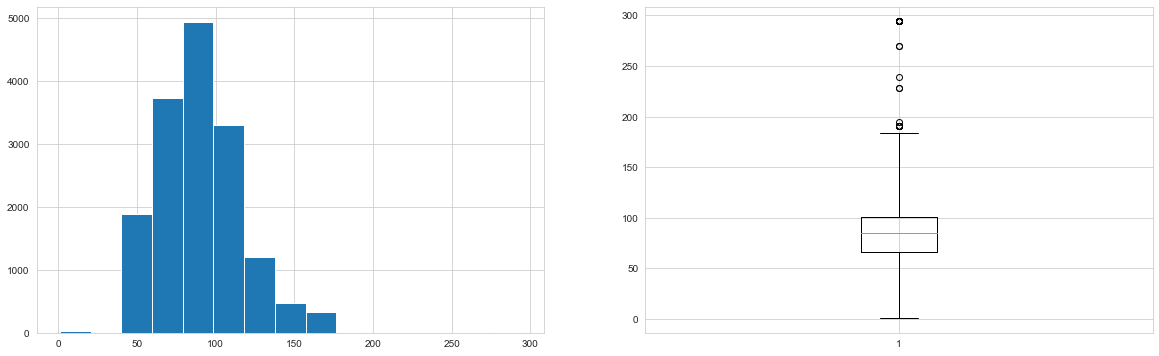

In [35]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.hp_kw, bins=15)

plt.subplot(122)
plt.boxplot(df.hp_kw, whis=2.5)

plt.show()

In [36]:
df.hp_kw.loc[df.hp_kw < 51] = np.nan

In [37]:
fill(df, "make_model", "body_type", "hp_kw", "mode")

Number of NaN :  0
------------------
85.00     2544
66.00     2123
81.00     1403
100.00    1317
110.00    1117
70.00      890
125.00     714
51.00      703
55.00      589
118.00     552
92.00      466
121.00     392
147.00     380
77.00      353
56.00      296
54.00      276
103.00     253
87.00      232
165.00     194
88.00      177
60.00      160
162.00      98
74.00       81
96.00       72
71.00       59
101.00      47
67.00       40
154.00      39
122.00      35
119.00      30
164.00      27
135.00      24
52.00       22
82.00       22
78.00       20
294.00      18
146.00      18
141.00      16
57.00       10
104.00       8
120.00       8
191.00       7
112.00       7
155.00       6
117.00       6
184.00       5
90.00        4
76.00        4
65.00        4
80.00        3
93.00        3
168.00       3
149.00       3
98.00        3
150.00       2
228.00       2
53.00        2
270.00       2
86.00        2
167.00       2
63.00        2
127.00       2
89.00        2
143.00       2
14

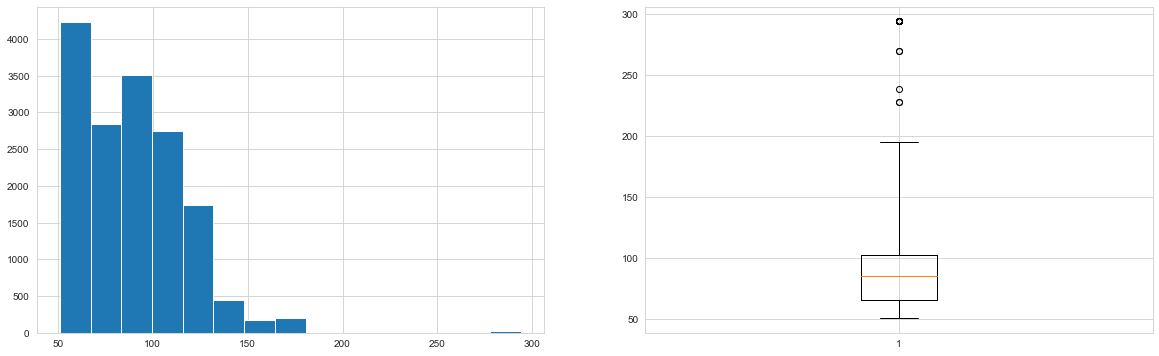

In [38]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.hp_kw, bins=15)

plt.subplot(122)
plt.boxplot(df.hp_kw, whis=2.5)

plt.show()

### co2_emission

In [39]:
look_before("co2_emission")

column name    :  co2_emission
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  126
--------------------------------
120.00     849
119.00     694
102.00     689
104.00     679
106.00     615
          ... 
80.00        1
990.00       1
1060.00      1
331.00       1
193.00       1
Name: co2_emission, Length: 126, dtype: int64


In [40]:
df.co2_emission.describe()

count   15915.00
mean      123.03
std       248.52
min         0.00
25%       104.00
50%       117.00
75%       129.00
max     14457.00
Name: co2_emission, dtype: float64

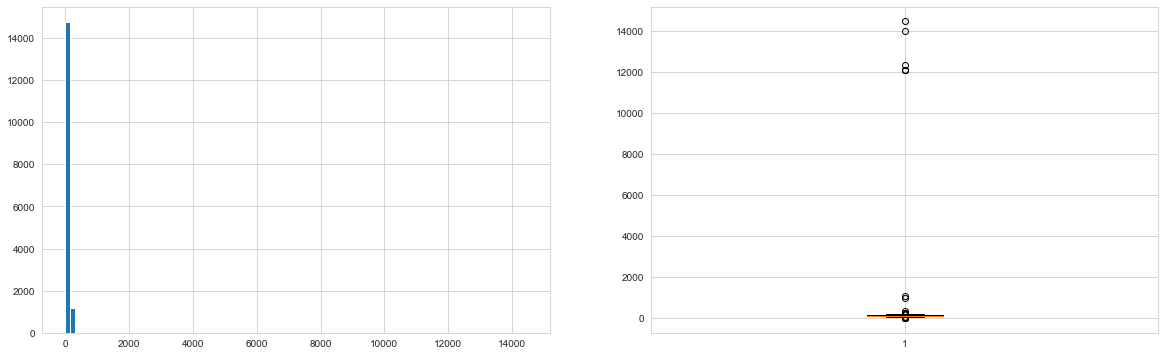

In [41]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.co2_emission, bins=100)

plt.subplot(122)
plt.boxplot(df.co2_emission, whis=2.5)

plt.show()

In [42]:
cond = ((df.co2_emission < 36) | (df.co2_emission > 330))

df.loc[cond, "co2_emission"] = np.nan

In [43]:
fill(df, "make_model", "body_type", "co2_emission", "median")

Number of NaN :  0
------------------
120.00    849
119.00    700
102.00    689
104.00    680
106.00    617
         ... 
160.00      1
253.00      1
80.00       1
51.00       1
193.00      1
Name: co2_emission, Length: 115, dtype: int64


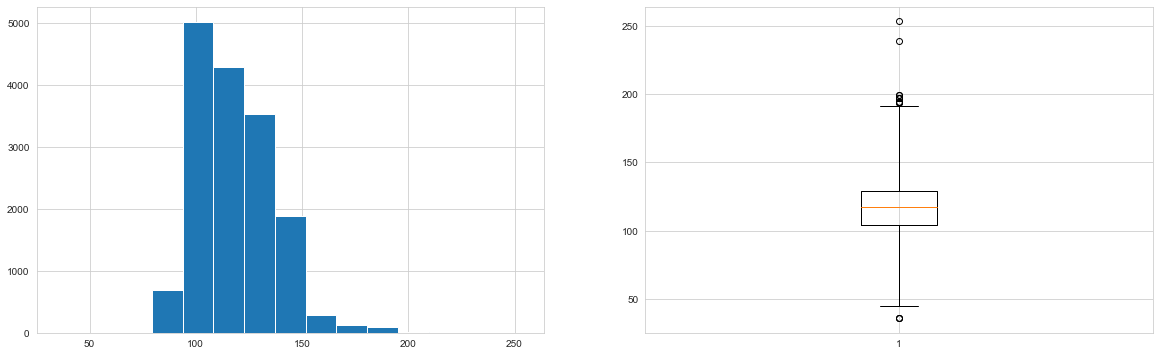

In [44]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.co2_emission, bins=15)

plt.subplot(122)
plt.boxplot(df.co2_emission, whis=2.5)

plt.show()

### cons_comb

In [45]:
look_before("cons_comb")

column name    :  cons_comb
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  64
--------------------------------
4.00    1010
5.60     940
5.40     899
5.00     807
4.70     760
3.90     733
4.50     720
5.10     677
4.40     667
3.80     584
4.20     569
4.80     546
4.90     534
5.30     530
5.20     466
4.60     444
5.50     388
3.70     369
5.90     369
4.10     362
5.70     342
6.00     331
3.30     326
4.30     317
3.50     307
6.20     219
3.60     194
6.30     181
6.10     175
5.80     164
6.60     148
3.40     143
6.80     136
6.40      75
3.00      73
7.40      66
6.70      45
6.50      43
7.10      39
1.00      38
6.90      27
3.20      25
8.30      20
3.45      19
7.60      14
5.15      11
7.00      10
3.10       7
7.20       6
7.80       6
4.75       5
8.00       5
8.60       4
1.60       3
8.70       3
7.90       3
0.00       2
8.10       2
7.30       2
4.30       1
4.55       1
9.10       1
7.50       1
1.20       1
Name: con

In [46]:
df.cons_comb.describe()

count   15915.00
mean        4.82
std         0.89
min         0.00
25%         4.10
50%         4.80
75%         5.40
max         9.10
Name: cons_comb, dtype: float64

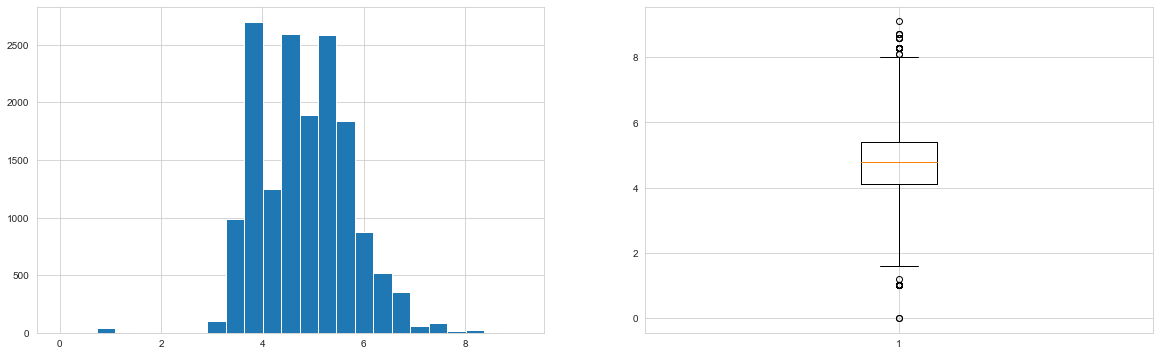

In [47]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(df.cons_comb, bins = 25)

plt.subplot(122)
plt.boxplot(df.cons_comb, whis = 2)

plt.show()

### nr_of_doors

In [48]:
look_before("nr_of_doors")

column name    :  nr_of_doors
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
--------------------------------
5.00    11784
4.00     3079
3.00      831
2.00      219
1.00        1
7.00        1
Name: nr_of_doors, dtype: int64


In [49]:
df.nr_of_doors.replace([1, 7], np.nan, inplace=True)

In [50]:
fill(df, "make_model", "body_type", "nr_of_doors", "mode")

Number of NaN :  0
------------------
5.00    11786
4.00     3079
3.00      831
2.00      219
Name: nr_of_doors, dtype: int64


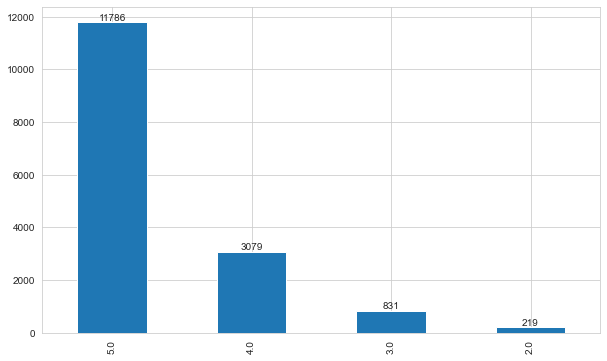

In [51]:
fig, ax = plt.subplots()

df.nr_of_doors.value_counts(dropna = False).plot.bar()

for container in ax.containers:
    ax.bar_label(container);

### nr_of_seats

In [52]:
look_before("nr_of_seats")

column name    :  nr_of_seats
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
--------------------------------
5.00    14304
4.00     1127
7.00      362
2.00      119
6.00        2
3.00        1
Name: nr_of_seats, dtype: int64


In [53]:
df.nr_of_seats.replace([3, 6], np.nan, inplace=True)

In [54]:
fill(df, "make_model", "body_type", "nr_of_seats", "mode")

Number of NaN :  0
------------------
5.00    14307
4.00     1127
7.00      362
2.00      119
Name: nr_of_seats, dtype: int64


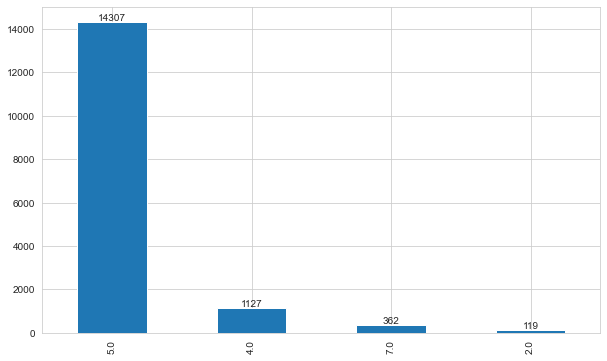

In [55]:
fig, ax = plt.subplots()

df.nr_of_seats.value_counts(dropna=False).plot.bar()

for container in ax.containers:
    ax.bar_label(container);

### make_model

In [56]:
look_before("make_model")

column name    :  make_model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  9
--------------------------------
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64


In [57]:
drop_index = df[df.make_model == "Audi A2"].index
drop_index

Int64Index([2614], dtype='int64')

In [58]:
df.drop(drop_index, axis=0, inplace=True)

In [59]:
df.shape

(15914, 27)

### fuel

In [60]:
look_before("fuel")

column name    :  fuel
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
--------------------------------
Benzine     8548
Diesel      7297
LPG/CNG       64
Electric       5
Name: fuel, dtype: int64


# Final Step (Checking final situation of data via graphs)

In [61]:
df_num = df.select_dtypes("number")
df_num

,price,km,hp_kw,previous_owners,inspection_new,age,nr_of_doors,nr_of_seats,displacement_cc,weight_kg,cons_comb,co2_emission,gears
0,15770,56013.00,66.00,2.00,1,3.00,5.00,5.00,1422.00,1220.00,3.80,99.00,7.00
1,14500,80000.00,141.00,1.00,0,2.00,3.00,4.00,1798.00,1255.00,5.60,129.00,7.00
2,14640,83450.00,85.00,1.00,0,3.00,4.00,4.00,1598.00,1135.00,3.80,99.00,7.00
3,14500,73000.00,66.00,1.00,0,3.00,3.00,4.00,1422.00,1195.00,3.80,99.00,6.00
4,16790,16200.00,66.00,1.00,1,3.00,5.00,5.00,1422.00,1135.00,4.10,109.00,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,39950,16.99,147.00,0.00,0,0.00,5.00,5.00,1997.00,1758.00,5.30,139.00,6.00
15915,39885,9900.00,165.00,1.00,0,0.00,5.00,5.00,1798.00,1708.00,7.40,168.00,7.00
15916,39875,15.00,146.00,1.00,1,0.00,5.00,7.00,1997.00,1734.00,5.30,139.00,6.00
15917,39700,10.00,147.00,1.00,0,0.00,5.00,7.00,1997.00,1758.00,5.30,139.00,6.00


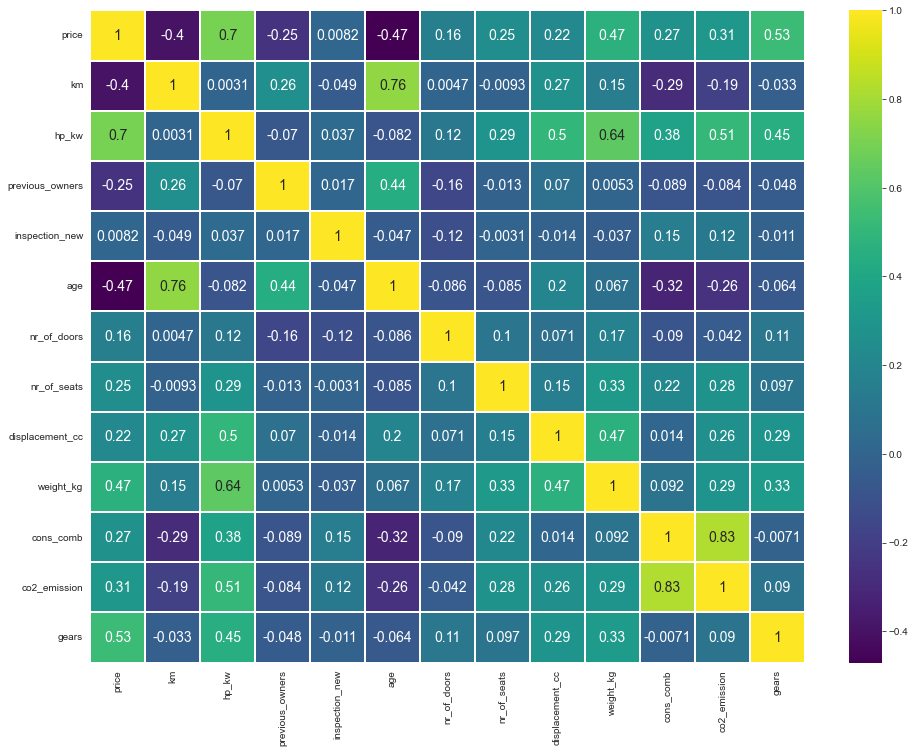

In [62]:
plt.figure(figsize=(16, 12))

sns.heatmap(df_num.corr(), annot=True, cmap="viridis", linewidths=0.2, annot_kws={"size": 14});

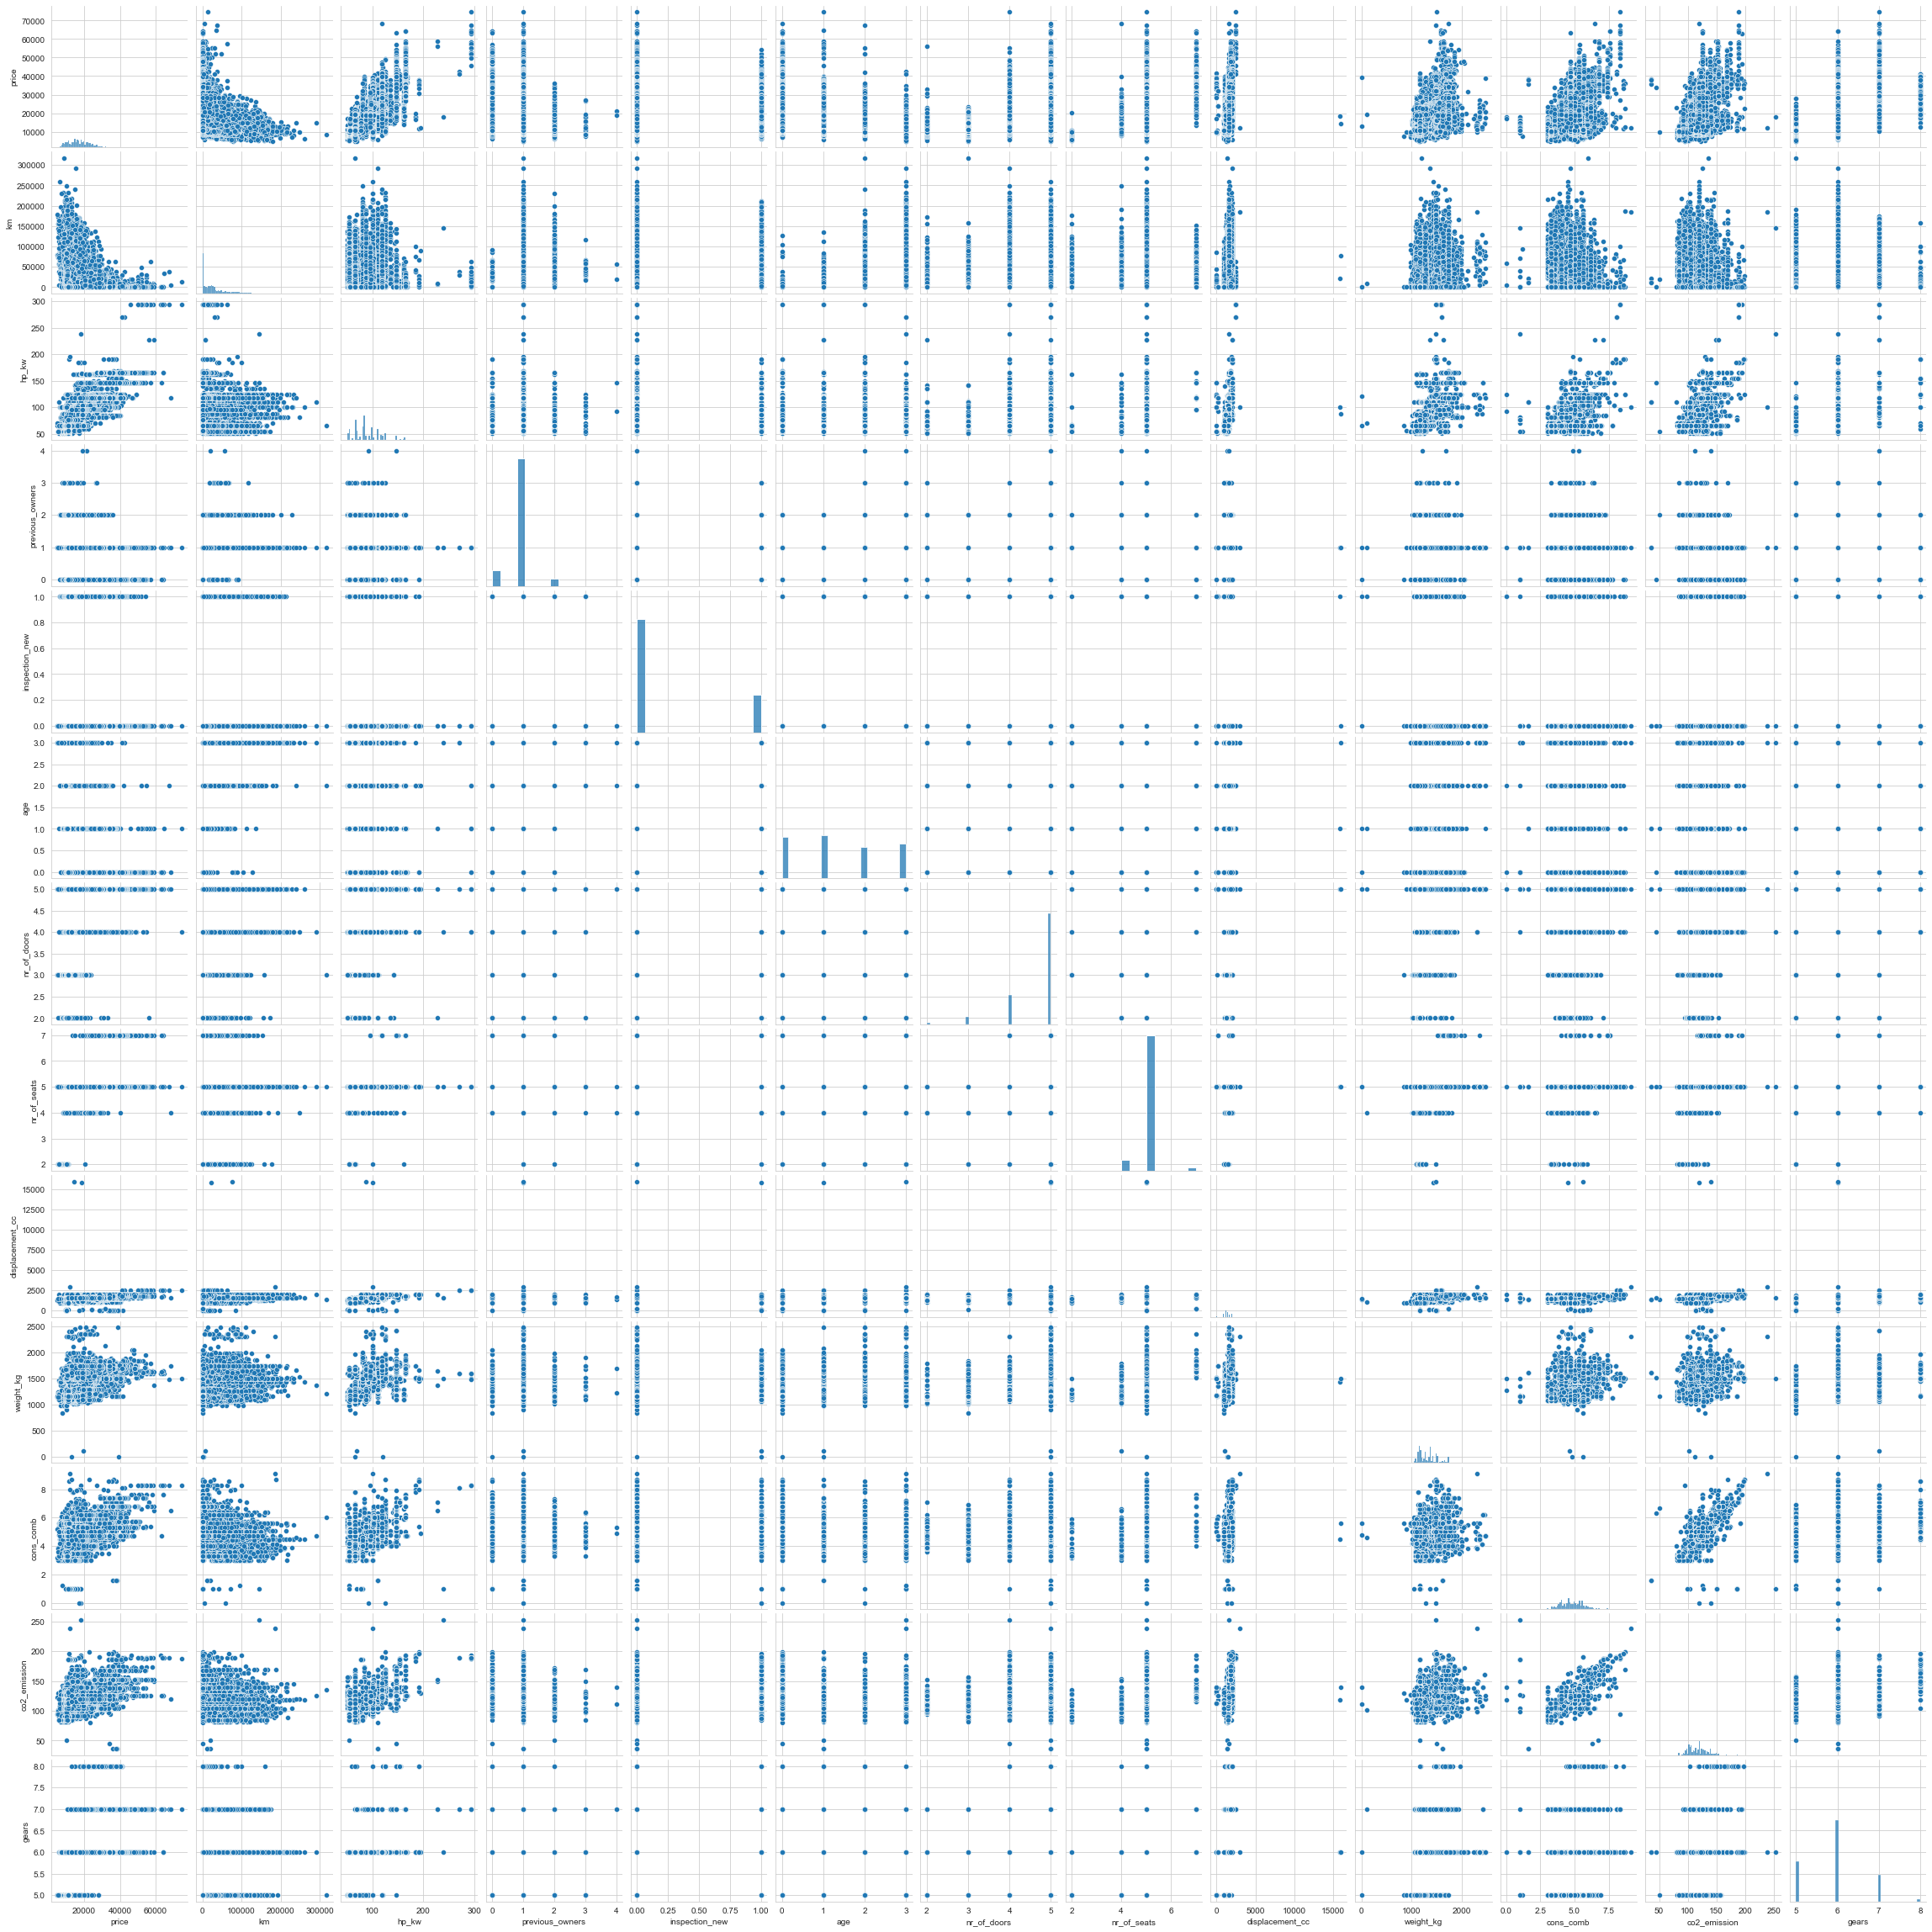

In [63]:
sns.pairplot(df_num, size=2.5, palette="viridis");

## Export dataframe to csv file (without dummy)

In [64]:
df.to_csv("scout_final_not_dummy.csv", index=False)

# Dummy Operation

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15914 entries, 0 to 15918
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15914 non-null  object 
 1   body_type            15914 non-null  object 
 2   price                15914 non-null  int64  
 3   vat                  15914 non-null  object 
 4   km                   15914 non-null  float64
 5   hp_kw                15914 non-null  float64
 6   type                 15914 non-null  object 
 7   previous_owners      15914 non-null  float64
 8   inspection_new       15914 non-null  int64  
 9   age                  15914 non-null  float64
 10  body_color           15914 non-null  object 
 11  paint_type           15914 non-null  object 
 12  upholstery_type      15914 non-null  object 
 13  nr_of_doors          15914 non-null  float64
 14  nr_of_seats          15914 non-null  float64
 15  gearing_type         15914 non-null 

In [66]:
df.shape

(15914, 27)

In [67]:
df_dummied = pd.get_dummies(df, columns=["make_model", "body_type", "vat", "type", "inspection_new", "body_color",
                                          "paint_type", "upholstery_type", "nr_of_doors", "nr_of_seats","gearing_type",
                                          "drive_chain", "fuel"])

In [68]:
df_dummied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15914 entries, 0 to 15918
Data columns (total 77 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              15914 non-null  int64  
 1   km                                 15914 non-null  float64
 2   hp_kw                              15914 non-null  float64
 3   previous_owners                    15914 non-null  float64
 4   age                                15914 non-null  float64
 5   displacement_cc                    15914 non-null  float64
 6   weight_kg                          15914 non-null  float64
 7   cons_comb                          15914 non-null  float64
 8   co2_emission                       15914 non-null  float64
 9   comfort_convenience                15914 non-null  object 
 10  entertainment_media                15914 non-null  object 
 11  extras                             15914 non-null  obj

## Export dataframe to csv file (dummy)

In [69]:
df_dummied.to_csv("scout_final_dummy.csv", index=False)